# Notebook 2: Data Preprocessing and Feature Engineering

**Phase 1: Regression vs. Noise Classification**

This notebook implements Steps 2-5 of the Phase 1 implementation:
- Label cleaning
- Feature selection and leakage check
- Handling missing values
- Encoding categorical variables

---

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the Data

In [2]:
# Load the alerts data
alerts = pd.read_csv("../Input/alerts_data.csv")

print(f"Dataset shape: {alerts.shape}")
print(f"\nColumns: {list(alerts.columns)}")
print(f"\nFirst few rows:")
alerts.head()

Dataset shape: (17989, 62)

Columns: ['single_alert_new_value', 'single_alert_classifier', 'alert_summary_prev_push_revision', 'alert_summary_id', 'single_alert_amount_pct', 'alert_summary_performance_tags', 'single_alert_prev_value', 'alert_summary_first_triaged', 'single_alert_series_signature_has_subtests', 'alert_summary_framework', 'single_alert_series_signature_framework_id', 'single_alert_series_signature_suite_public_name', 'alert_summary_related_alerts', 'single_alert_taskcluster_metadata_retry_id', 'alert_summary_prev_push_id', 'alert_summary_status', 'alert_summary_push_id', 'single_alert_status', 'alert_summary_assignee_username', 'single_alert_series_signature_signature_hash', 'single_alert_prev_taskcluster_metadata_task_id', 'single_alert_series_signature_machine_platform', 'alert_summary_bug_number', 'alert_summary_repository', 'alert_summary_bug_due_date', 'single_alert_series_signature_test_public_name', 'alert_summary_issue_tracker', 'single_alert_amount_abs', 'single

,single_alert_new_value,single_alert_classifier,alert_summary_prev_push_revision,alert_summary_id,single_alert_amount_pct,alert_summary_performance_tags,single_alert_prev_value,alert_summary_first_triaged,single_alert_series_signature_has_subtests,alert_summary_framework,single_alert_series_signature_framework_id,single_alert_series_signature_suite_public_name,alert_summary_related_alerts,single_alert_taskcluster_metadata_retry_id,alert_summary_prev_push_id,alert_summary_status,alert_summary_push_id,single_alert_status,alert_summary_assignee_username,single_alert_series_signature_signature_hash,single_alert_prev_taskcluster_metadata_task_id,single_alert_series_signature_machine_platform,alert_summary_bug_number,alert_summary_repository,alert_summary_bug_due_date,single_alert_series_signature_test_public_name,alert_summary_issue_tracker,single_alert_amount_abs,single_alert_id,single_alert_series_signature_measurement_unit,single_alert_taskcluster_metadata_task_id,single_alert_backfill_record_total_backfills_successful,single_alert_summary_id,single_alert_series_signature_option_collection_hash,single_alert_prev_taskcluster_metadata_retry_id,single_alert_is_regression,single_alert_manually_created,single_alert_classifier_email,single_alert_backfill_record_total_backfills_failed,single_alert_backfill_record_total_actions_triggered,alert_summary_assignee_email,alert_summary_creation_timestamp,single_alert_prev_profile_url,alert_summary_notes,single_alert_series_signature_test,single_alert_noise_profile,single_alert_series_signature_lower_is_better,alert_summary_revision,single_alert_related_summary_id,alert_summary_bug_updated,single_alert_profile_url,single_alert_backfill_record_context,single_alert_starred,single_alert_backfill_record_total_backfills_in_progress,single_alert_t_value,single_alert_series_signature_suite,single_alert_series_signature_extra_options,single_alert_backfill_record_status,single_alert_series_signature_tags,alert_summary_triage_due_date,push_timestamp,signature_id
0,9.60,mozilla-ldap/nchevobbe@mozilla.com,702dc0aa87a8c3e4929277c1dc8220a7dd72418f,38845.0,4.71,NaN,10.08,2023-06-23 14:14:20.453894,False,12.0,12.0,NaN,|177677|,NaN,1261278.0,2.0,1261541.0,2.0,NaN,1467106a81e6c19c8f7203e576298427d552b4a3,NaN,windows10-64-shippable-qr,NaN,autoland,2023-06-30 06:18:02.024736,NaN,1.0,-0.48,177750.0,ms,NaN,NaN,38845.0,102210fe594ee9b33d82058545b1ed14f4c8206e,NaN,False,False,nchevobbe@mozilla.com,NaN,NaN,NaN,2023-06-23 06:18:02.024736,NaN,NaN,custom.styleeditor.close.DAMP,OK,True,78880280c2765ec0520ece3184fc8fdbac5b5356,38852.0,NaN,NaN,NaN,False,NaN,9.06,damp,"e10s, fission, stylo, webrender",NaN,NaN,2023-06-28 06:18:02.024736,2023-06-21 20:43:57,4768977
1,10.58,mozilla-ldap/jdescottes@mozilla.com,25a29224e55d9a839d6fddde206208a453535ec8,39272.0,9.59,NaN,9.65,2023-08-14 08:38:03.490554,False,12.0,12.0,NaN,|179573|179581|,NaN,1284750.0,5.0,1285020.0,2.0,NaN,1467106a81e6c19c8f7203e576298427d552b4a3,NaN,windows10-64-shippable-qr,NaN,autoland,2023-08-18 01:00:27.106098,NaN,1.0,0.93,179563.0,ms,NaN,NaN,39272.0,102210fe594ee9b33d82058545b1ed14f4c8206e,NaN,True,False,jdescottes@mozilla.com,NaN,NaN,NaN,2023-08-11 01:00:27.106098,NaN,NaN,custom.styleeditor.close.DAMP,OK,True,46b5603cd2b8de629b659ec8d44fc7b086782c46,39297.0,NaN,NaN,NaN,False,NaN,9.03,damp,"e10s, fission, stylo, webrender",NaN,NaN,2023-08-16 01:00:27.106098,2023-08-09 13:49:06,4768977
2,10.09,mozilla-ldap/jdescottes@mozilla.com,11f47f2a1cf08c1e0b5bb6374f2a7dd1f49c8cac,39287.0,5.54,NaN,10.68,2023-08-14 09:06:16.991824,False,12.0,12.0,NaN,|179664|179668|179670|179671|,NaN,1285701.0,6.0,1285800.0,4.0,mozilla-ldap/jdescottes@mozilla.com,1467106a81e6c19c8f7203e576298427d552b4a3,NaN,windows10-64-shippable-qr,NaN,autoland,2023-08-21 14:07:14.457937,NaN,1.0,-0.59,179626.0,ms,NaN,NaN,39287.0,102210fe594ee9b33d82058545b1ed14f4c8206e,NaN,False,False,jdescottes@mozilla.com,NaN,NaN,jdescottes@mozilla.com,2023-08-12 14:07:14.457937,NaN,NaN,custom.styleeditor.close.DAMP,OK,T

## 3. Step 2: Label Cleaning

According to the requirements:
- Remove rows where `single_alert_is_regression` is missing
- Map labels to integers: regression = 1, else = 0

In [3]:
# Check target variable distribution before cleaning
print("Original label distribution:")
print(alerts["single_alert_is_regression"].value_counts(dropna=False))
print(f"\nMissing labels: {alerts['single_alert_is_regression'].isna().sum()}")

# Remove rows with missing labels
alerts_clean = alerts.dropna(subset=["single_alert_is_regression"]).copy()
print(f"\nRows after removing missing labels: {len(alerts_clean)}")
print(f"Rows dropped: {len(alerts) - len(alerts_clean)}")

# Map labels to integers
# True (regression) -> 1, False (noise/improvement) -> 0
alerts_clean['target'] = alerts_clean['single_alert_is_regression'].astype(int)

print("\nCleaned label distribution:")
print(alerts_clean['target'].value_counts())
print(f"\nClass balance: {alerts_clean['target'].mean():.2%} regressions")

Original label distribution:
single_alert_is_regression
False    10377
True      7612
Name: count, dtype: int64

Missing labels: 0

Rows after removing missing labels: 17989
Rows dropped: 0

Cleaned label distribution:
target
0    10377
1     7612
Name: count, dtype: int64

Class balance: 42.31% regressions


## 4. Step 3: Feature Selection and Leakage Check

We define three feature groups:

### 4.1 Magnitude and Statistical Signals (Numeric)

In [4]:
# Magnitude features - capturing how strong the alert appears
magnitude_features = [
    "single_alert_amount_abs",
    "single_alert_amount_pct",
    "single_alert_t_value",
    "single_alert_prev_value",
    "single_alert_new_value"
]

# Check which magnitude features exist in the dataset
magnitude_features_available = [f for f in magnitude_features if f in alerts_clean.columns]
magnitude_features_missing = [f for f in magnitude_features if f not in alerts_clean.columns]

print("Magnitude Features:")
print(f"Available: {magnitude_features_available}")
if magnitude_features_missing:
    print(f"Missing: {magnitude_features_missing}")

# Show statistics for available magnitude features
if magnitude_features_available:
    print("\nMagnitude features statistics:")
    display(alerts_clean[magnitude_features_available].describe())

Magnitude Features:
Available: ['single_alert_amount_abs', 'single_alert_amount_pct', 'single_alert_t_value', 'single_alert_prev_value', 'single_alert_new_value']

Magnitude features statistics:


,single_alert_amount_abs,single_alert_amount_pct,single_alert_t_value,single_alert_prev_value,single_alert_new_value
count,1.798900e+04,17989.000000,1.798900e+04,1.798900e+04,1.798900e+04
mean,-5.786768e+04,103.993529,2.965224e+12,2.678651e+06,2.620783e+06
std,2.737563e+06,4761.977798,1.642637e+14,3.139582e+07,3.000483e+07
min,-1.160267e+08,0.030000,7.000000e+00,1.000000e-02,-6.603300e+02
25%,-5.702000e+01,4.570000,7.570000e+00,2.324900e+02,2.329700e+02
50%,-4.510000e+00,8.760000,9.160000e+00,6.055300e+02,6.179200e+02
75%,4.673000e+01,17.980000,1.397000e+01,1.400000e+03,1.404020e+03
max,8.271574e+07,461900.000000,1.423659e+16,1.110687e+09,1.095123e+09


### 4.2 Test and Platform Context (Categorical)

In [5]:
# Context features - capturing where the alert came from
context_features = [
    "repository_name",
    "repository_id",
    "framework_id",
    "machine_platform",
    "single_alert_series_signature_suite",
    "single_alert_series_signature_tags",
    "lower_is_better"
]

# Check which context features exist
context_features_available = [f for f in context_features if f in alerts_clean.columns]
context_features_missing = [f for f in context_features if f not in alerts_clean.columns]

print("Context Features:")
print(f"Available: {context_features_available}")
if context_features_missing:
    print(f"Missing: {context_features_missing}")

# Show cardinality for each categorical feature
if context_features_available:
    print("\nContext features cardinality:")
    for feat in context_features_available:
        n_unique = alerts_clean[feat].nunique()
        n_missing = alerts_clean[feat].isna().sum()
        print(f"  {feat}: {n_unique} unique values, {n_missing} missing ({n_missing/len(alerts_clean):.1%})")

Context Features:
Available: ['single_alert_series_signature_suite', 'single_alert_series_signature_tags']
Missing: ['repository_name', 'repository_id', 'framework_id', 'machine_platform', 'lower_is_better']

Context features cardinality:
  single_alert_series_signature_suite: 186 unique values, 0 missing (0.0%)
  single_alert_series_signature_tags: 9 unique values, 8165 missing (45.4%)


### 4.3 Workflow Hints (Categorical or Numeric)

In [6]:
# Workflow features - describing alert behavior in Mozilla's workflow
# IMPORTANT: Only include features recorded at alert creation time to avoid label leakage
workflow_features = [
    "single_alert_manually_created",
    "single_alert_status",
    "alert_summary_status"
]

# Check which workflow features exist
workflow_features_available = [f for f in workflow_features if f in alerts_clean.columns]
workflow_features_missing = [f for f in workflow_features if f not in alerts_clean.columns]

print("Workflow Features:")
print(f"Available: {workflow_features_available}")
if workflow_features_missing:
    print(f"Missing: {workflow_features_missing}")

# Show value distributions
if workflow_features_available:
    print("\nWorkflow features distributions:")
    for feat in workflow_features_available:
        print(f"\n{feat}:")
        print(alerts_clean[feat].value_counts(dropna=False).head(10))

Workflow Features:
Available: ['single_alert_manually_created', 'single_alert_status', 'alert_summary_status']

Workflow features distributions:

single_alert_manually_created:
single_alert_manually_created
False    17705
True       284
Name: count, dtype: int64

single_alert_status:
single_alert_status
4.0    8785
2.0    5627
0.0    2171
3.0    1136
1.0     270
Name: count, dtype: int64

alert_summary_status:
alert_summary_status
2.0    5215
5.0    4564
4.0    3424
0.0    2203
6.0     888
3.0     854
7.0     564
1.0     241
8.0      36
Name: count, dtype: int64


### 4.4 Leakage Check

Remove columns that are:
- Identifiers (IDs, names that don't carry meaning)
- Post-triage decisions (terms like 'triaged', 'fixed', 'backed_out')
- Nearly all missing values (>90% missing)

In [7]:
# Identify columns with high missing rates
missing_rates = alerts_clean.isna().mean().sort_values(ascending=False)
high_missing_cols = missing_rates[missing_rates > 0.9].index.tolist()

print("Columns with >90% missing values:")
for col in high_missing_cols:
    print(f"  {col}: {missing_rates[col]:.1%} missing")

# Identify potential leakage columns (contain certain keywords)
leakage_keywords = ['triaged', 'fixed', 'backed_out', 'acknowledged', 'bug_id']
potential_leakage_cols = []
for col in alerts_clean.columns:
    if any(keyword in col.lower() for keyword in leakage_keywords):
        potential_leakage_cols.append(col)

print("\nPotential leakage columns (based on naming):")
print(potential_leakage_cols)

# Combine all features we want to keep
all_selected_features = (magnitude_features_available + 
                        context_features_available + 
                        workflow_features_available)

# Remove duplicates
all_selected_features = list(set(all_selected_features))

print(f"\nTotal selected features: {len(all_selected_features)}")
print("Selected features:")
for feat in sorted(all_selected_features):
    print(f"  - {feat}")

Columns with >90% missing values:
  single_alert_series_signature_suite_public_name: 100.0% missing
  single_alert_series_signature_test_public_name: 100.0% missing
  single_alert_prev_profile_url: 100.0% missing
  single_alert_profile_url: 100.0% missing

Potential leakage columns (based on naming):
['alert_summary_first_triaged']

Total selected features: 10
Selected features:
  - alert_summary_status
  - single_alert_amount_abs
  - single_alert_amount_pct
  - single_alert_manually_created
  - single_alert_new_value
  - single_alert_prev_value
  - single_alert_series_signature_suite
  - single_alert_series_signature_tags
  - single_alert_status
  - single_alert_t_value


## 5. Step 4: Handle Missing Values

Strategy:
- **Numeric features**: Fill with median
- **Categorical features**: Fill with "Unknown"

In [8]:
# Create a copy of the dataframe with only selected features + target
df_model = alerts_clean[all_selected_features + ['target']].copy()

print(f"Model dataframe shape: {df_model.shape}")
print(f"\nMissing values before imputation:")
missing_before = df_model.isna().sum()
missing_before = missing_before[missing_before > 0].sort_values(ascending=False)
for col, count in missing_before.items():
    print(f"  {col}: {count} ({count/len(df_model):.1%})")

Model dataframe shape: (17989, 11)

Missing values before imputation:
  single_alert_series_signature_tags: 8165 (45.4%)


In [9]:
# Separate numeric and categorical features
numeric_cols = df_model.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('target')  # Don't impute the target

categorical_cols = df_model.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Numeric features ({len(numeric_cols)}): {numeric_cols}")
print(f"\nCategorical features ({len(categorical_cols)}): {categorical_cols}")

# Handle numeric features - median imputation
if numeric_cols:
    print("\nImputing numeric features with median...")
    for col in numeric_cols:
        median_val = df_model[col].median()
        n_missing = df_model[col].isna().sum()
        if n_missing > 0:
            df_model[col].fillna(median_val, inplace=True)
            print(f"  {col}: filled {n_missing} values with {median_val}")

# Handle categorical features - fill with "Unknown"
if categorical_cols:
    print("\nImputing categorical features with 'Unknown'...")
    for col in categorical_cols:
        n_missing = df_model[col].isna().sum()
        if n_missing > 0:
            df_model[col].fillna("Unknown", inplace=True)
            print(f"  {col}: filled {n_missing} values")

# Verify no missing values remain
print(f"\nMissing values after imputation: {df_model.isna().sum().sum()}")

Numeric features (7): ['single_alert_amount_pct', 'single_alert_amount_abs', 'single_alert_t_value', 'alert_summary_status', 'single_alert_new_value', 'single_alert_prev_value', 'single_alert_status']

Categorical features (3): ['single_alert_series_signature_suite', 'single_alert_series_signature_tags', 'single_alert_manually_created']

Imputing numeric features with median...

Imputing categorical features with 'Unknown'...
  single_alert_series_signature_tags: filled 8165 values

Missing values after imputation: 0


## 6. Step 5: Encode Categorical Variables

Strategy:
- **Low-cardinality features** (<50 unique values): One-hot encoding
- **High-cardinality features** (>=50 unique values): Frequency encoding

In [10]:
# Analyze cardinality of categorical features
cardinality_threshold = 50

low_cardinality_cols = []
high_cardinality_cols = []

print("Categorical feature cardinality analysis:")
for col in categorical_cols:
    n_unique = df_model[col].nunique()
    if n_unique < cardinality_threshold:
        low_cardinality_cols.append(col)
        print(f"  {col}: {n_unique} unique (LOW) -> One-hot encoding")
    else:
        high_cardinality_cols.append(col)
        print(f"  {col}: {n_unique} unique (HIGH) -> Frequency encoding")

Categorical feature cardinality analysis:
  single_alert_series_signature_suite: 186 unique (HIGH) -> Frequency encoding
  single_alert_series_signature_tags: 10 unique (LOW) -> One-hot encoding
  single_alert_manually_created: 2 unique (LOW) -> One-hot encoding


In [11]:
# Apply one-hot encoding for low-cardinality features
if low_cardinality_cols:
    print(f"\nApplying one-hot encoding to {len(low_cardinality_cols)} features...")
    df_encoded = pd.get_dummies(df_model, columns=low_cardinality_cols, prefix=low_cardinality_cols, drop_first=True)
    print(f"Shape after one-hot encoding: {df_encoded.shape}")
else:
    df_encoded = df_model.copy()

# Apply frequency encoding for high-cardinality features
if high_cardinality_cols:
    print(f"\nApplying frequency encoding to {len(high_cardinality_cols)} features...")
    for col in high_cardinality_cols:
        # Calculate frequency of each value
        freq_map = df_encoded[col].value_counts(normalize=True).to_dict()
        # Create new feature with frequency encoding
        df_encoded[f"{col}_freq"] = df_encoded[col].map(freq_map)
        # Drop the original categorical column
        df_encoded.drop(columns=[col], inplace=True)
        print(f"  {col} -> {col}_freq")
    print(f"Shape after frequency encoding: {df_encoded.shape}")

print(f"\nFinal encoded dataframe shape: {df_encoded.shape}")
print(f"Number of features: {df_encoded.shape[1] - 1}")  # -1 for target column


Applying one-hot encoding to 2 features...
Shape after one-hot encoding: (17989, 19)

Applying frequency encoding to 1 features...
  single_alert_series_signature_suite -> single_alert_series_signature_suite_freq
Shape after frequency encoding: (17989, 19)

Final encoded dataframe shape: (17989, 19)
Number of features: 18


## 7. Feature Summary and Data Quality Check

In [12]:
# Verify data types
print("Data types summary:")
print(df_encoded.dtypes.value_counts())

# Check for any infinite values
print(f"\nInfinite values: {np.isinf(df_encoded.select_dtypes(include=[np.number])).sum().sum()}")

# Check for any remaining missing values
print(f"Missing values: {df_encoded.isna().sum().sum()}")

# Show final feature list
feature_cols = [col for col in df_encoded.columns if col != 'target']
print(f"\nFinal feature count: {len(feature_cols)}")
print("\nFeature list (first 20):")
for i, feat in enumerate(feature_cols[:20], 1):
    print(f"  {i}. {feat}")

if len(feature_cols) > 20:
    print(f"  ... and {len(feature_cols) - 20} more features")

Data types summary:
bool       10
float64     8
int64       1
Name: count, dtype: int64

Infinite values: 0
Missing values: 0

Final feature count: 18

Feature list (first 20):
  1. single_alert_amount_pct
  2. single_alert_amount_abs
  3. single_alert_t_value
  4. alert_summary_status
  5. single_alert_new_value
  6. single_alert_prev_value
  7. single_alert_status
  8. single_alert_series_signature_tags_bytecode-cached, cold, fission, webrender
  9. single_alert_series_signature_tags_bytecode-cached, fission, warm, webrender
  10. single_alert_series_signature_tags_cold, fission, interactive, webrender
  11. single_alert_series_signature_tags_cold, fission, webrender
  12. single_alert_series_signature_tags_cold, webrender
  13. single_alert_series_signature_tags_fission, warm, webrender
  14. single_alert_series_signature_tags_fission, webrender
  15. single_alert_series_signature_tags_warm, webrender
  16. single_alert_series_signature_tags_webrender
  17. single_alert_manually_cre

## 8. Visualize Feature Groups

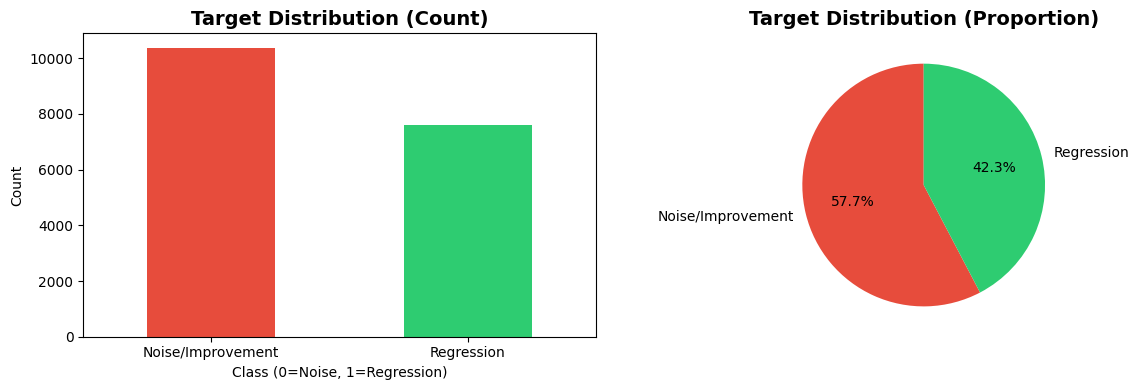

Class imbalance ratio (minority/majority): 0.734


In [13]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
df_encoded['target'].value_counts().plot(kind='bar', ax=axes[0], color=['#e74c3c', '#2ecc71'])
axes[0].set_title('Target Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0=Noise, 1=Regression)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Noise/Improvement', 'Regression'], rotation=0)

# Proportion plot
target_props = df_encoded['target'].value_counts(normalize=True)
target_props.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['#e74c3c', '#2ecc71'],
                 labels=['Noise/Improvement', 'Regression'], startangle=90)
axes[1].set_title('Target Distribution (Proportion)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print(f"Class imbalance ratio (minority/majority): {target_props.min()/target_props.max():.3f}")

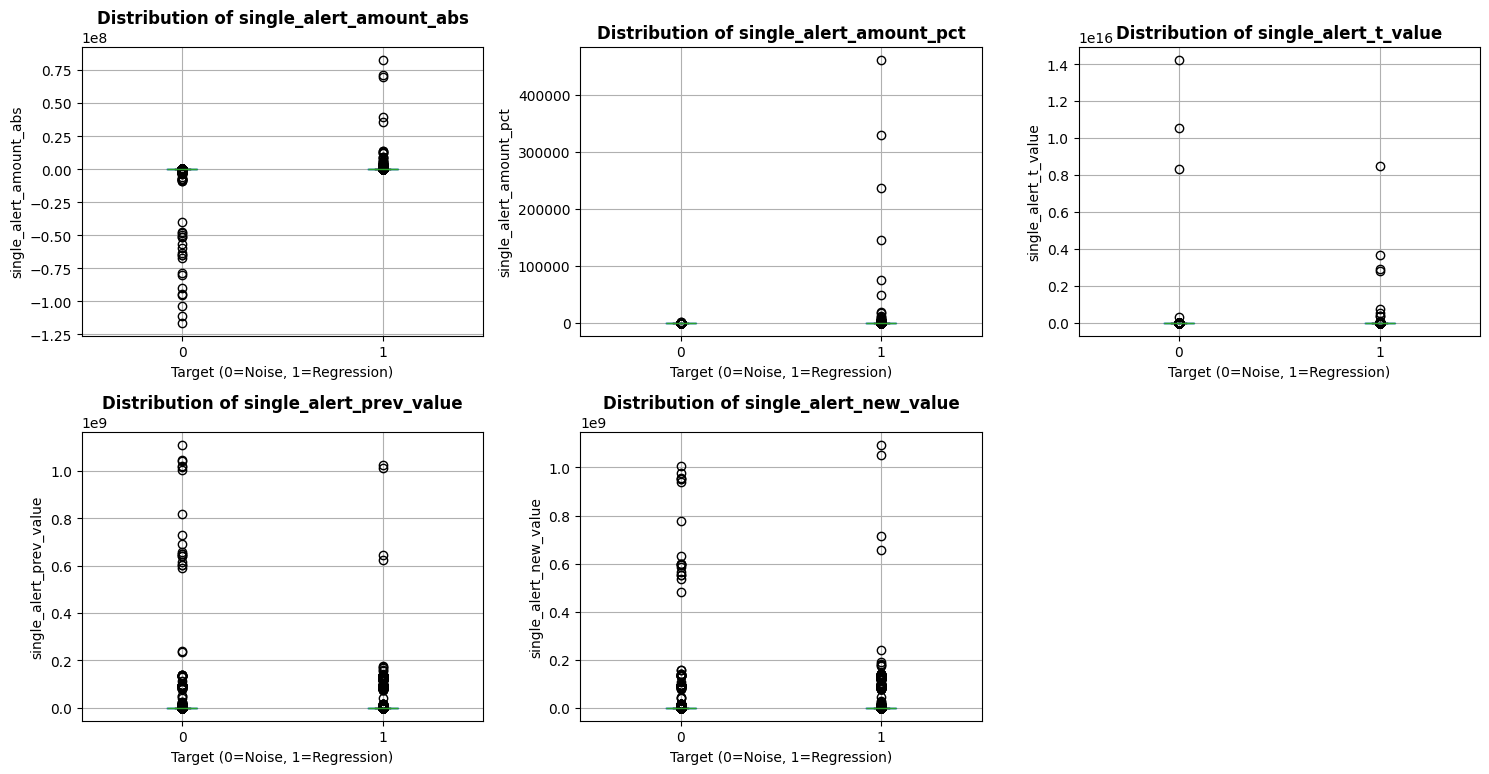

In [14]:
# Visualize distributions of key magnitude features by target
magnitude_features_in_df = [f for f in magnitude_features_available if f in df_encoded.columns]

if magnitude_features_in_df:
    n_features = len(magnitude_features_in_df)
    n_cols = min(3, n_features)
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    if n_features == 1:
        axes = np.array([axes])
    axes = axes.flatten()
    
    for i, feat in enumerate(magnitude_features_in_df):
        df_encoded.boxplot(column=feat, by='target', ax=axes[i])
        axes[i].set_title(f'Distribution of {feat}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Target (0=Noise, 1=Regression)')
        axes[i].set_ylabel(feat)
        axes[i].get_figure().suptitle('')  # Remove default title
    
    # Hide any unused subplots
    for i in range(n_features, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

## 9. Save Preprocessed Data

In [15]:
# Save the preprocessed data
output_path = "../results/data/preprocessed_alerts.csv"
df_encoded.to_csv(output_path, index=False)
print(f"Preprocessed data saved to: {output_path}")
print(f"Shape: {df_encoded.shape}")
print(f"Features: {df_encoded.shape[1] - 1}")
print(f"Samples: {df_encoded.shape[0]}")

Preprocessed data saved to: ../results/data/preprocessed_alerts.csv
Shape: (17989, 19)
Features: 18
Samples: 17989


## 10. Summary and Next Steps

### Summary of Preprocessing Steps:

1. ✅ **Label Cleaning**: Removed missing labels and mapped to binary (0/1)
2. ✅ **Feature Selection**: Selected magnitude, context, and workflow features  
3. ✅ **Leakage Check**: Excluded post-triage features and high-missing columns
4. ✅ **Missing Value Handling**: Median imputation for numeric, "Unknown" for categorical
5. ✅ **Categorical Encoding**: One-hot for low-cardinality, frequency for high-cardinality

### Next Steps (Notebook 3):

1. Train/validation/test split (70/15/15 with stratification)
2. Build baseline models (Logistic Regression, Random Forest, Gradient Boosting)
3. Hyperparameter tuning
4. Model evaluation and comparison

In [16]:
# Print final summary statistics
print("="*60)
print("PREPROCESSING COMPLETE")
print("="*60)
print(f"Final dataset shape: {df_encoded.shape}")
print(f"Number of features: {len([col for col in df_encoded.columns if col != 'target'])}")
print(f"Number of samples: {len(df_encoded)}")
print(f"Target distribution: {df_encoded['target'].value_counts().to_dict()}")
print(f"Class balance: {df_encoded['target'].mean():.2%} regressions")
print("="*60)

PREPROCESSING COMPLETE
Final dataset shape: (17989, 19)
Number of features: 18
Number of samples: 17989
Target distribution: {0: 10377, 1: 7612}
Class balance: 42.31% regressions
